In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\kerry\AppData\Local\Temp\ipykernel_2608\1140549349.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1665532704.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\li

In [2]:
from sqlalchemy import create_engine
import pymssql
import pandas as pd

server = "mssql-82792-0.cloudclusters.net:16272"
username = "user"
password = "RiceOwls1912" 
database = "ghz"
string = "mssql+pymssql://" + username + ":" + password + "@" + server + "/" + database
conn = create_engine(string).connect()
data = pd.read_sql(
    """
    select ticker, date, ret, roeq 
    from data
    order by date
    """, 
    conn
)
data = data.dropna()
data.head()

,ticker,date,ret,roeq
0,EWST,2000-01,-0.044118,0.017047
1,SABC,2000-01,-0.025641,0.027942
2,IROQ,2000-01,-0.008475,0.031816
3,DPAC,2000-01,-0.097276,0.045041
4,SCTT,2000-01,-0.099338,0.061219


In [3]:
data["decile"] = data.groupby("date").roeq.transform(
  lambda x: pd.qcut(x, 5, labels=range(1, 6))
)
data.head()

,ticker,date,ret,roeq,decile
0,EWST,2000-01,-0.044118,0.017047,3
1,SABC,2000-01,-0.025641,0.027942,3
2,IROQ,2000-01,-0.008475,0.031816,4
3,DPAC,2000-01,-0.097276,0.045041,4
4,SCTT,2000-01,-0.099338,0.061219,5


In [4]:
rets = data.groupby(['date', 'decile']).ret.mean()
rets = rets.unstack()
rets.head()

decile,1,2,3,4,5
date,,,,,
2000-01,0.199432,0.075519,0.016835,-0.014594,-0.003020
2000-02,0.366746,0.141581,0.043943,0.043550,0.063504
2000-03,-0.065864,0.014373,0.018757,0.036923,0.054467
2000-04,-0.217721,-0.073392,-0.037092,-0.018193,-0.047450
2000-05,-0.134255,-0.056660,-0.020230,-0.025020,-0.044011


In [5]:
rets.mean()

decile
1    0.010083
2    0.011746
3    0.012197
4    0.012553
5    0.012682
dtype: float64

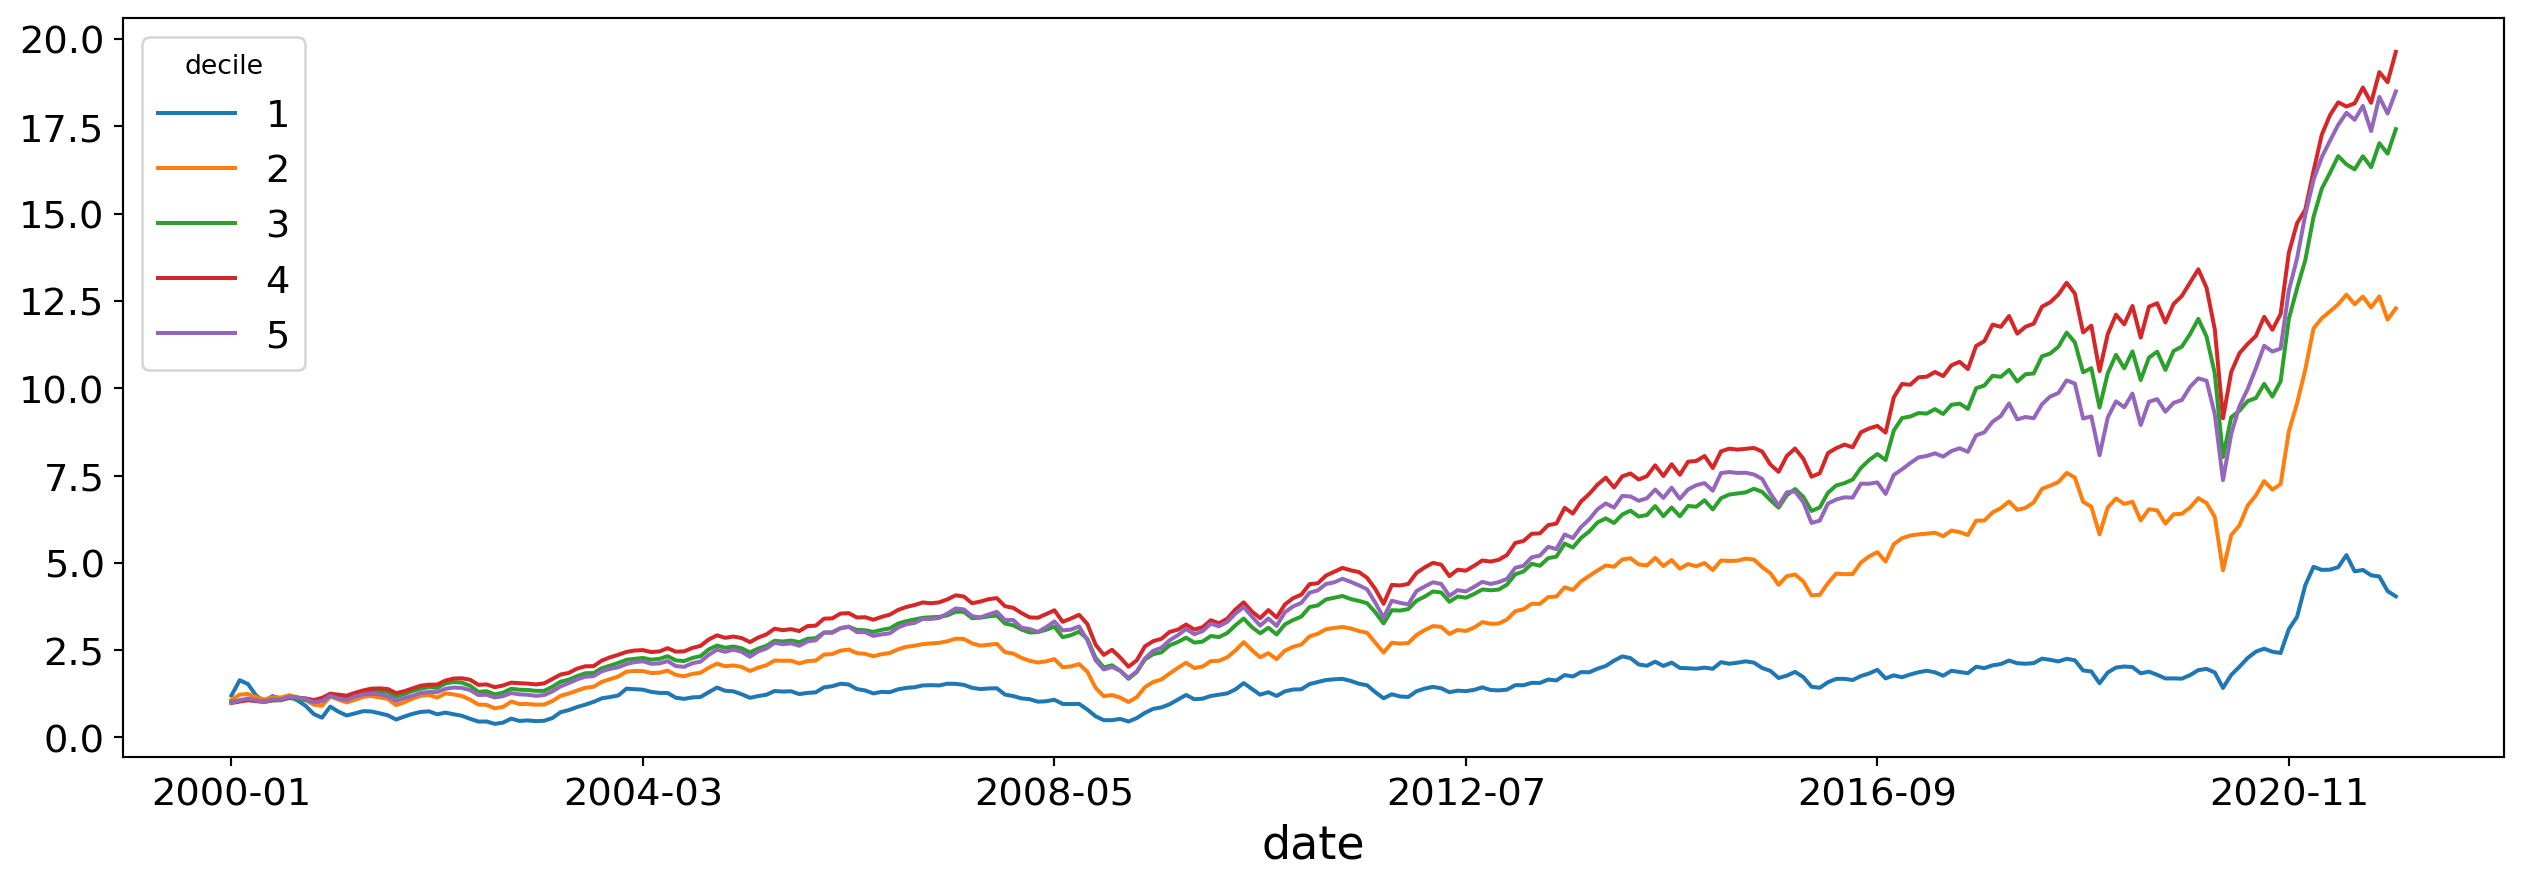

In [6]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['figure.figsize'] = (16,5)
_ = (1+rets).cumprod().plot()